In [1]:
#Lab3
#Class:ELEC4511 HardwareSoftware
#Name:Fuwei Huang,Claire Charlton,John Milner

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt

In [3]:
class LinearModel(object):
    def __init__(self):
        self.w=np.random.randn(1)[0] #random slope
        self.b=np.random.randn(1)[0] #random intercept
        
    def loss(self,x,y):
        dw=0
        db=0
        n = float(len(x))
        y_pred=self.w * x + self.b
        dw+= (-2/n) * sum(x * (y - y_pred)) #-2/n*x*(y-(mx+b))
        db+= (-2/n) * sum(y - y_pred) #2/n*(y-(mx+b))
        return dw,db
        
    def gradient_descent(self, iterations, learning_rate = 0.001):
        for i in range(iterations):
            dw,db = self.loss(x,y)
            self.w= self.w - (learning_rate * dw)
            self.b= self.b - (learning_rate * db)
        #y_pred = self.w * x + self.b
            
    def fit(self,x,y):
        self.loss(x,y)
        self.gradient_descent(10000)
        
    def result(self):
        return self.w, self.b

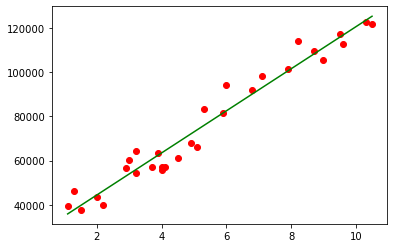

In [4]:
data = pd.read_csv("Salary_Data.csv")
x=np.array(data['YearsExperience'])
y=np.array(data['Salary'])
lm=LinearModel()
lm.fit(x,y)
plt.scatter(x,y,c='red')
plt.plot(x,lm.result()[0]*x+lm.result()[1],color = 'green')

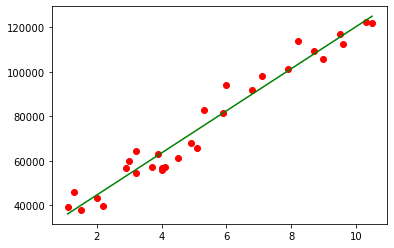

In [5]:
from sklearn.linear_model import LinearRegression
data = pd.read_csv("Salary_Data.csv")
x=np.array(data['YearsExperience']).reshape(-1,1)
y=np.array(data['Salary']).reshape(-1,1)
lr = LinearRegression().fit(x, y)
w=lr.coef_[0,0]
b=lr.intercept_[0]
plt.scatter(x,y,c='red')
plt.plot(x,w*x+b,color = 'green')